In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

In [3]:
original_df = pd.read_csv('sales_per_store_per_sku_ord_2.csv')
original_df

,store,sku,date,sales
0,1186,601516,2016-02-04,20.0
1,1186,601516,2016-02-05,11.0
2,1186,601516,2016-02-06,10.0
3,1186,601516,2016-02-08,10.0
4,1186,601516,2016-02-09,10.0
...,...,...,...,...
161524,194,100085056000002,2021-05-27,1.0
161525,194,100085056000002,2021-05-30,3.0
161526,194,100085056000002,2021-05-31,1.0
161527,194,100085056000002,2021-06-12,2.0


In [4]:
original_df['date'] = pd.to_datetime(original_df['date'])
original_df['day_count'] = (original_df['date'] - original_df['date'].min()).dt.days
original_df['month_count'] = (original_df['date'].dt.year - original_df['date'].min().year) * 12 + original_df['date'].dt.month - original_df['date'].min().month
original_df['week_number'] = original_df['date'].dt.isocalendar().week
original_df['year_count'] = original_df['date'].dt.year - original_df['date'].min().year
original_df['day_of_week'] = original_df['date'].dt.dayofweek
original_df['day_of_month'] = original_df['date'].dt.day
original_df['day_of_week_name'] = original_df['date'].dt.day_name()
original_df['month_of_year'] = original_df['date'].dt.month
original_df['year'] = original_df['date'].dt.year
original_df

,store,sku,date,sales,day_count,month_count,week_number,year_count,day_of_week,day_of_month,day_of_week_name,month_of_year,year
0,1186,601516,2016-02-04,20.0,1098,36,5,3,3,4,Thursday,2,2016
1,1186,601516,2016-02-05,11.0,1099,36,5,3,4,5,Friday,2,2016
2,1186,601516,2016-02-06,10.0,1100,36,5,3,5,6,Saturday,2,2016
3,1186,601516,2016-02-08,10.0,1102,36,6,3,0,8,Monday,2,2016
4,1186,601516,2016-02-09,10.0,1103,36,6,3,1,9,Tuesday,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161524,194,100085056000002,2021-05-27,1.0,3037,99,21,8,3,27,Thursday,5,2021
161525,194,100085056000002,2021-05-30,3.0,3040,99,21,8,6,30,Sunday,5,2021
161526,194,100085056000002,2021-05-31,1.0,3041,99,22,8,0,31,Monday,5,2021
161527,194,100085056000002,2021-06-12,2.0,3053,100,23,8,5,12,Saturday,6,2021


In [5]:
agg_month_item_df = original_df.pivot_table(index='month_count', columns='sku', values='sales', fill_value=0, aggfunc=np.sum)
agg_month_item_df = agg_month_item_df.reindex(list(range(agg_month_item_df.index.min(), agg_month_item_df.index.max()+1)),fill_value=0)
agg_month_store_df = original_df.pivot_table(index='month_count', columns='store', values='sales', fill_value=0, aggfunc=np.sum)
agg_month_store_df = agg_month_store_df.reindex(list(range(agg_month_store_df.index.min(), agg_month_store_df.index.max()+1)),fill_value=0)

In [6]:
sku_df = agg_month_item_df[[601900]] 
sku_df = sku_df.reindex(list(range(sku_df.index.min(), sku_df.index.max()+1)),fill_value=0) 
sku_df

sku,601900
month_count,
0,0
1,0
2,0
3,0
4,0
...,...
114,325
115,242
116,275


In [7]:
store_df = agg_month_store_df[[109]] 
store_df = store_df.reindex(list(range(sku_df.index.min(), sku_df.index.max()+1)),fill_value=0) 
store_df

store,109
month_count,
0,0
1,0
2,0
3,0
4,0
...,...
114,52
115,53
116,55


In [42]:
combined_df = pd.DataFrame(sku_df.values, columns=['SKU'])
combined_df['Store'] = store_df.values
combined_df = combined_df.astype("float64")
combined_df

,SKU,Store
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
114,325.0,52.0
115,242.0,53.0
116,275.0,55.0
117,558.0,79.0


<AxesSubplot: >

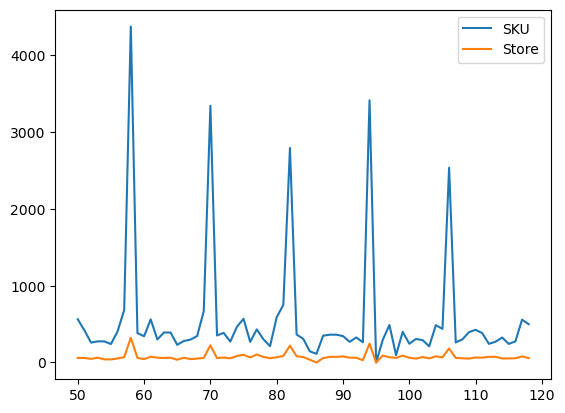

In [44]:
combined_df[50:].plot()

In [45]:
ad_fuller_result_1 = adfuller(combined_df['SKU'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(combined_df['Store'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -3.0082114840081955
p-value: 0.03413463443297829

---------------------

realcons
ADF Statistic: -7.034881268755407
p-value: 6.052182897314108e-10


In [46]:
train_df=combined_df[50:90]
test_df=combined_df[90:]

In [47]:
print(test_df.shape)


(29, 2)


In [48]:
model = VAR(train_df.diff()[1:])


In [49]:


sorted_order=model.select_order(maxlags=12)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        19.66       19.75   3.437e+08       19.68
1        19.66       19.95   3.450e+08       19.74
2        19.76       20.24   3.860e+08       19.91
3        19.79       20.47   4.045e+08       19.99
4        20.00       20.87   5.126e+08       20.26
5        20.26       21.31   6.930e+08       20.57
6        20.51       21.75   9.581e+08       20.88
7        20.78       22.22   1.403e+09       21.21
8        20.84       22.47   1.745e+09       21.32
9        20.82       22.64   2.172e+09       21.36
10       21.02       23.03   3.829e+09       21.62
11       15.48       17.69   2.741e+07       16.14
12      12.74*      15.14*  5.695e+06*      13.46*
--------------------------------------------------


In [51]:
from statsmodels.tsa.statespace.varmax import VARMAX

var_model = VARMAX(train_df, order=(12,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

C:\Users\Oran Nahum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                           Statespace Model Results                           
Dep. Variable:       ['SKU', 'Store']   No. Observations:                   40
Model:                        VAR(12)   Log Likelihood                -471.298
                          + intercept   AIC                           1048.597
Date:                Thu, 26 Jan 2023   BIC                           1138.107
Time:                        12:05:56   HQIC                          1080.961
Sample:                             0                                         
                                 - 40                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             2.48, 3.05   Jarque-Bera (JB):           2.35, 0.62
Prob(Q):                        0.12, 0.08   Prob(JB):                   0.31, 0.73
Heteroskedasticity (H):         0.82, 6.85   Skew:                       0.40, 0.30
Prob(H) (two-sided):            0.73,

C:\Users\Oran Nahum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
test_df

,SKU,Store
90,344.0,79.0
91,269.0,63.0
92,326.0,61.0
93,263.0,30.0
94,3416.0,246.0
95,0.0,0.0
96,296.0,90.0
97,488.0,68.0
98,96.0,60.0
99,399.0,89.0


In [53]:
n_forecast = len(test_df)
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [55]:

predictions.columns=['SKU_predicted','Store_predicted']
predictions

,SKU_predicted,Store_predicted
90,664.030501,56.152135
91,146.507357,34.396370
92,401.574288,49.822119
93,665.617995,68.029766
94,2853.599874,225.295177
95,765.738907,86.102998
96,111.485715,29.225338
97,-15.664953,23.094294
98,94.854973,24.059218
99,456.119152,54.248151


In [56]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot: >

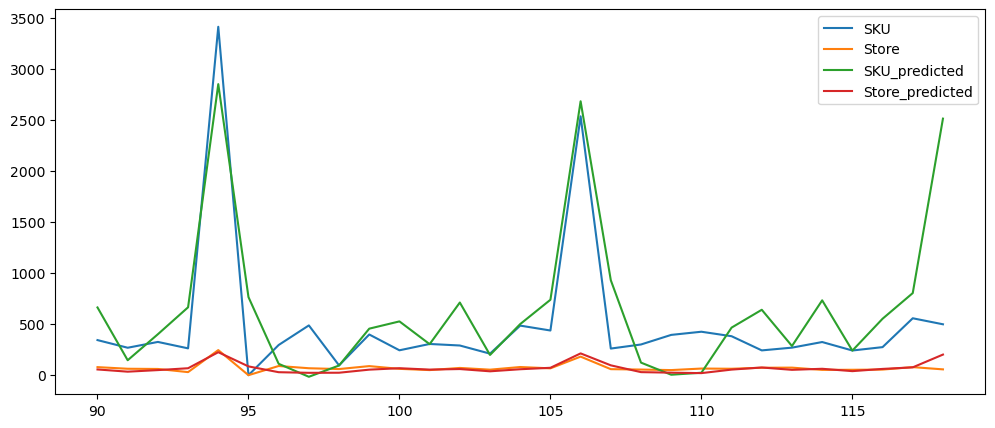

In [57]:
test_vs_pred.plot(figsize=(12,5))
